In this lab session, we will be working with the dataset related to the [california housing](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) dataset, where the goal is to predict the median price of a given house block.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
train_data = pd.read_csv('california_housing_train.csv')
test_data = pd.read_csv('california_housing_test.csv')

In [55]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_val, y_train_unscaled, y_val_unscaled = train_test_split(train_data.iloc[:, :-1],
                                                  train_data.iloc[:, [-1]],
                                                  test_size=0.2,
                                                  random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In standard linear regression (i.e., ordinary least squares), it is not necessary to scale the target variable.

However, scaling the target variable might be beneficial in certain situations:

* **Comparing Coefficients**: If your features are on different scales, it can be challenging to compare the magnitudes of the coefficients for different features. Scaling the target can make coefficient magnitudes more interpretable.

* **Gradient Descent**: If you are using an optimization algorithm like gradient descent to train your linear regression model, scaling the target variable can help the optimization process converge faster. Scaling is especially important when using regularized linear regression techniques like ``Ridge`` or ``Lasso``.


In [67]:
target_scaler = StandardScaler()

y_train = target_scaler.fit_transform(y_train_unscaled)
y_val = target_scaler.transform(y_val_unscaled)

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

mae_not_scaled = mean_absolute_error(y_val_unscaled, target_scaler.inverse_transform(y_pred))
mse_not_scaled = mean_squared_error(y_val_unscaled, target_scaler.inverse_transform(y_pred))
rmse_not_scaled = np.sqrt(mse_not_scaled)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

print('\n')

print("Mean Absolute Error:", mae_not_scaled)
print("Mean Squared Error:", mse_not_scaled)
print("Root Mean Squared Error:", rmse_not_scaled)


Mean Absolute Error: 0.4323106652703779
Mean Squared Error: 0.34670231663087603
Root Mean Squared Error: 0.5888143312037132


Mean Absolute Error: 49983.474651229204
Mean Squared Error: 4634658406.223356
Root Mean Squared Error: 68078.32552452621


(3400, 1)

# Ridge Regression

In [89]:
from sklearn.linear_model import Ridge

# Train a Ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Evaluate the Ridge model
y_pred = ridge_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("Ridge Regression - Mean Absolute Error:", mae)
print("Ridge Regression - Mean Squared Error:", mse)
print("Ridge Regression - Root Mean Squared Error:", rmse)

mae_not_scaled = mean_absolute_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
mse_not_scaled = mean_squared_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
rmse_not_scaled = np.sqrt(mse_not_scaled)
print('\n')

print("Mean Absolute Error:", mae_not_scaled)
print("Mean Squared Error:", mse_not_scaled)
print("Root Mean Squared Error:", rmse_not_scaled)


Ridge Regression - Mean Absolute Error: 0.43231306736167147
Ridge Regression - Mean Squared Error: 0.3467100932459548
Ridge Regression - Root Mean Squared Error: 0.5888209347891384


Mean Absolute Error: 49983.752379443955
Mean Squared Error: 4634762362.709132
Root Mean Squared Error: 68079.08902672782


# Lasso Regression

In [90]:
from sklearn.linear_model import Lasso

# Train a Lasso regression model
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

# Evaluate the Lasso model
y_pred = lasso_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("Lasso Regression - Mean Absolute Error:", mae)
print("Lasso Regression - Mean Squared Error:", mse)
print("Lasso Regression - Root Mean Squared Error:", rmse)


mae_not_scaled = mean_absolute_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
mse_not_scaled = mean_squared_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
rmse_not_scaled = np.sqrt(mse_not_scaled)
print('\n')

print("Mean Absolute Error:", mae_not_scaled)
print("Mean Squared Error:", mse_not_scaled)
print("Root Mean Squared Error:", rmse_not_scaled)


Lasso Regression - Mean Absolute Error: 0.8023907042838504
Lasso Regression - Mean Squared Error: 1.0314044068466546
Lasso Regression - Root Mean Squared Error: 1.0155808224098437


Mean Absolute Error: 92771.88524338235
Mean Squared Error: 13787641083.163029
Root Mean Squared Error: 117420.78641860235


In case of ridge and lasso regression, you can adjust the alpha parameter to control the strength of regularization. Larger values of alpha result in stronger regularization, which can help prevent overfitting but might lead to underfitting if set too high.




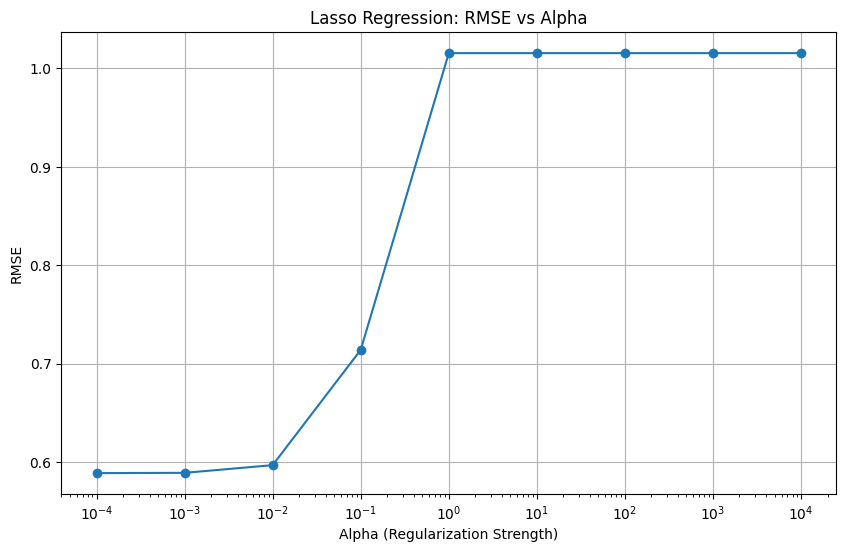

In [91]:
alphas = np.logspace(-4, 4, 9)

rmse_values = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append(rmse)

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, rmse_values, marker='o')
plt.title('Lasso Regression: RMSE vs Alpha')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('RMSE')
plt.grid()
plt.show()


In [93]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("Lasso Regression - Mean Absolute Error:", mae)
print("Lasso Regression - Mean Squared Error:", mse)
print("Lasso Regression - Root Mean Squared Error:", rmse)


mae_not_scaled = mean_absolute_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
mse_not_scaled = mean_squared_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
rmse_not_scaled = np.sqrt(mse_not_scaled)
print('\n')

print("Mean Absolute Error:", mae_not_scaled)
print("Mean Squared Error:", mse_not_scaled)
print("Root Mean Squared Error:", rmse_not_scaled)


Lasso Regression - Mean Absolute Error: 0.43908137281069753
Lasso Regression - Mean Squared Error: 0.3563392683575482
Lasso Regression - Root Mean Squared Error: 0.5969415954325417


Mean Absolute Error: 50766.299401807104
Mean Squared Error: 4763483560.218341
Root Mean Squared Error: 69017.99446679352


In [94]:
lasso_coefficients = lasso_model.coef_

print("Lasso Coefficients:")
for feature, coefficient in zip(train_data.columns, lasso_coefficients):
    print(f"{feature}: {coefficient}")


Lasso Coefficients:
longitude: -0.6435961390840176
latitude: -0.6885123878139845
housing_median_age: 0.12903151305680946
total_rooms: -0.0
total_bedrooms: 0.24607252218190764
population: -0.29095361873947884
households: 0.09517077903507133
median_income: 0.630580761998769


We can see that the estimated coefficient for ``total_rooms`` becomes 0 in case of Lasso. Remember that Lasso regression can lead to some coefficients being exactly zero, effectively performing feature selection.

Now, let's see the correlations of the original features.

# Correlation of the features

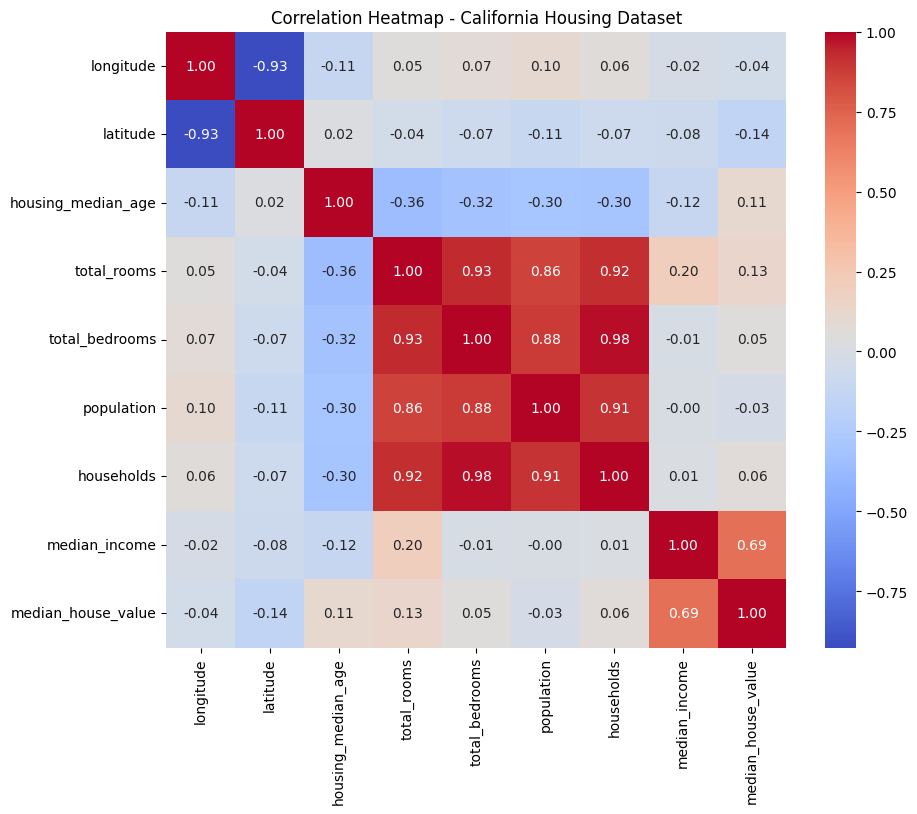

In [47]:
correlation_matrix = train_data.corr()

# Create a heatmap of the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - California Housing Dataset")
plt.show()

We can see that ``total_rooms``, ``total_bedrooms``, ``population`` and ``housholds`` are correlated with each other, that's why in case of Lasso the estimated coefficients for ``total_rooms`` was 0 and for ``housholds`` was rather small.

# Regression Trees

In [95]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [97]:
y_pred = tree_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


mae_not_scaled = mean_absolute_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
mse_not_scaled = mean_squared_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
rmse_not_scaled = np.sqrt(mse_not_scaled)
print('\n')

print("Mean Absolute Error:", mae_not_scaled)
print("Mean Squared Error:", mse_not_scaled)
print("Root Mean Squared Error:", rmse_not_scaled)


Mean Absolute Error: 0.3868563562585259
Mean Squared Error: 0.3642502621993619
Root Mean Squared Error: 0.6035314923012401


Mean Absolute Error: 44728.077352941174
Mean Squared Error: 4869236398.753823
Root Mean Squared Error: 69779.9140064949


# Bagging Trees

In [99]:
from sklearn.ensemble import BaggingRegressor

base_model = DecisionTreeRegressor()

bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


mae_not_scaled = mean_absolute_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
mse_not_scaled = mean_squared_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
rmse_not_scaled = np.sqrt(mse_not_scaled)
print('\n')

print("Mean Absolute Error:", mae_not_scaled)
print("Mean Squared Error:", mse_not_scaled)
print("Root Mean Squared Error:", rmse_not_scaled)


/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Mean Absolute Error: 0.2968538257616768
Mean Squared Error: 0.20128342171886174
Root Mean Squared Error: 0.4486462099682351


Mean Absolute Error: 34322.044
Mean Squared Error: 2690723014.394894
Root Mean Squared Error: 51872.17958014579


# Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


mae_not_scaled = mean_absolute_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
mse_not_scaled = mean_squared_error(y_val_unscaled, target_scaler.inverse_transform(y_pred.reshape(-1, 1)))
rmse_not_scaled = np.sqrt(mse_not_scaled)
print('\n')

print("Mean Absolute Error:", mae_not_scaled)
print("Mean Squared Error:", mse_not_scaled)
print("Root Mean Squared Error:", rmse_not_scaled)


/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.2796760092299724
Mean Squared Error: 0.1821825426485303
Root Mean Squared Error: 0.4268284698195872


Mean Absolute Error: 32335.95615588235
Mean Squared Error: 2435385667.3306146
Root Mean Squared Error: 49349.62682058107


In the above examples we have not performed any hyper-parameter tuning, we have only compared the performance of different regression methods on the validation set. According to those results, it seems like random forest regression outperforms the other methods (keep in mind that this can be a result of overfitting, that is why it's better to perform cross-validation).

Now let's use Random Forest Regressor to train on the whole training set and evaluate on the test set.

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(scaler.fit_transform(train_data.iloc[:, :-1]),
                        target_scaler.fit_transform(train_data.iloc[:, [-1]]).reshape(-1))

y_pred = random_forest_model.predict(scaler.transform(test_data.iloc[:, :-1])).reshape(-1, 1)

y_test = test_data.iloc[:, -1]
y_pred = target_scaler.inverse_transform(y_pred)

# Remember that we have scaled the target variable
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 32190.56986333333
Mean Squared Error: 2450559256.0880175
Root Mean Squared Error: 49503.12370030822


In **HW4**, you will need to perform thorough experiments with the above regression methods in order to get better results on the test set.